In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
os.chdir("C:\\Users\\sridhar\\Desktop\\DS2\\ML course kaggle\\2 Assignment")

In [3]:
data=pd.read_csv('mlbootcamp5_train.csv')

In [4]:
data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [5]:
data.shape

(70000, 13)

In [6]:
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
id             70000 non-null int64
age            70000 non-null int64
gender         70000 non-null int64
height         70000 non-null int64
weight         70000 non-null float64
ap_hi          70000 non-null int64
ap_lo          70000 non-null int64
cholesterol    70000 non-null int64
gluc           70000 non-null int64
smoke          70000 non-null int64
alco           70000 non-null int64
active         70000 non-null int64
cardio         70000 non-null int64
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


Question 1.1.  How many men and women are present in this dataset? Values of the gender feature were not given (whether "1" stands for women or for men) – figure this out by looking analyzing height, making the assumption that men are taller on average. 

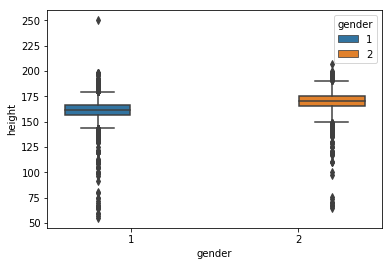

In [7]:
sns.boxplot(x='gender', y='height',hue='gender', data=data)

In [8]:
data[data['gender']==1]['height'].mean()

161.35561168460356

In [9]:
data[data['gender']==2]['height'].mean()

169.94789538210054

In [10]:
data['gender'].value_counts()

1    45530
2    24470
Name: gender, dtype: int64

In [11]:
#category-2 was taller on average so it is marked as Men
#No. of Women(1)=45530 
#No. of Men(2)=24470

Question 1.2. Which gender more often reports consuming alcohol - men or women?

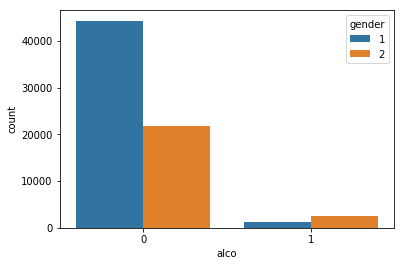

In [12]:
sns.countplot(x='alco', hue='gender',data=data)

In [13]:
# Men consuming alcohol more oftenly

Question 1.3. What is the difference between the percentages of smokers among men and women?

In [14]:
pd.crosstab(data['gender'],data['smoke'])

smoke,0,1
gender,,
1,44717,813
2,19114,5356


In [15]:
smokers=813/(44717+813)
print('% women smokers', smokers)

% women smokers 0.017856358444981332


In [16]:
smokers_Male=5356/(19114+5356)
print('% Male smokers', smokers_Male)

% Male smokers 0.21888026154474868


In [17]:
# Difference between the percentages of smokers among men and women is =20

Question 1.4.  What is the difference between median values of age for smokers and non-smokers (in months, rounded)? You'll need to figure out the units of feature age in this dataset.

In [18]:
print('Non smokers median age:', round(data[data['smoke']==0]['age'].median()*12/365),'months')

Non smokers median age: 648 months


In [19]:
print('smokers median age:', round(data[data['smoke']==1]['age'].median()*12/365),'months')

smokers median age: 629 months


In [20]:
print('Difference between median values of age for smokers and non-smokers :', 648-629,'months')

Difference between median values of age for smokers and non-smokers : 19 months


Question 1.5. Calculate the fraction of the people(60-64 yrs) with CVD for the two segments of                           
  1---cholesterol=1, systolic pressure<=120,   smoke=1,cardio=1                                                         
  2---cholesterol=3, systolic pressure=160-180, smoke=1,cardio=1.                                                     
  What is the ratio of these two fractions?

In [92]:
(data[(data['age']>=21900) & (data['age']<=23360) & (data['cholesterol']==1) & (data['ap_hi']<=120) & (data['smoke']==1)]['cardio']).count()

228

In [93]:
(data[(data['age']>=21900) & (data['age']<=23360) & (data['cholesterol']==1) & (data['ap_hi']<=120) & (data['smoke']==1) & (data['cardio']==1)]['cardio']).count()

74

In [81]:
(data[(data['age']>=21900) & (data['age']<=23360) & (data['cholesterol']==3) & (data['ap_hi']>=160) & (data['ap_hi']<=180) &(data['smoke']==1)]['cardio']).count()

21

In [82]:
(data[(data['age']>=21900) & (data['age']<=23360) & (data['cholesterol']==3) & (data['ap_hi']>=160) & (data['ap_hi']<=180) &(data['smoke']==1) & (data['cardio']==1)]['cardio']).count()

20

In [97]:
print('Ratio of fractions of two segments is :',(20/41)/(74/302))

Ratio of fractions of two segments is : 1.990771259063942


Question 1.6. Choose the correct statements:

   1. Median BMI in the sample is within the range of normal BMI values.
   2. The BMI for women is on average higher than for men.
   3. Healthy people have, on average, a higher BMI than the people with CVD.
   4. For healthy, non-drinking men, BMI is closer to the norm than for healthy, non-drinking women



In [22]:
BMI=data['weight']/((data['height']/100)*(data['height']/100))

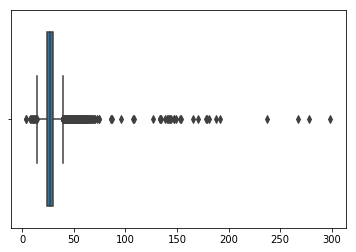

In [23]:
sns.boxplot(BMI)

In [98]:
#Meadian BMI
(data['weight']/((data['height']/100)*(data['height']/100))).median()

26.374068120774975

In [25]:
#Median BMI in the sample is out of the range of normal BMI values of 18.5 to 25

In [26]:
#Women average BMI
(data[data['gender']==1]['weight']/((data[data['gender']==1]['height']/100)*(data[data['gender']==1]['height']/100))).mean()

27.98758344183312

In [27]:
#Men Average BMI
(data[data['gender']==2]['weight']/((data[data['gender']==2]['height']/100)*(data[data['gender']==2]['height']/100))).mean()

26.754442357289474

In [28]:
# The BMI for women is on average higher than for men

In [29]:
#Healthy peoople Average BMI
(data[data['cardio']==0]['weight']/((data[data['cardio']==0]['height']/100)*(data[data['cardio']==0]['height']/100))).mean()

26.54817520679475

In [30]:
#CVD people Average BMI
(data[data['cardio']==1]['weight']/((data[data['cardio']==1]['height']/100)*(data[data['cardio']==1]['height']/100))).mean()

28.566060627015435

In [31]:
# People with CVD have higher on avrage BMI

In [32]:
x4=(data[(data['cardio']==0) & (data['alco']==0) & (data['gender']==2)]['weight']/((data[(data['cardio']==0) &  (data['alco']==0) & (data['gender']==2)]['height']/100)*(data[(data['cardio']==0) & (data['alco']==0) & (data['gender']==2)]['height']/100)))

In [33]:
#Healthy & Non-drinking Men Average BMI
x4.mean()

25.872638075460173

In [34]:
x5=(data[(data['cardio']==0) & (data['alco']==0) & (data['gender']==1)]['weight']/((data[(data['cardio']==0) &  (data['alco']==0) & (data['gender']==1)]['height']/100)*(data[(data['cardio']==0) & (data['alco']==0) & (data['gender']==1)]['height']/100)))

In [35]:
#Healthy & Non-drinking Women Average BMI
x5.mean()

26.845406594131518

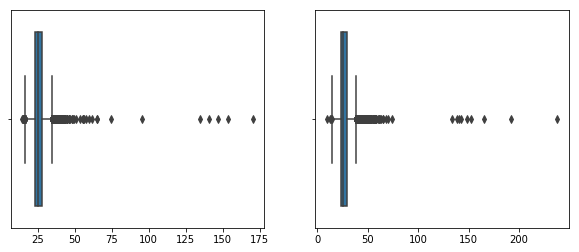

In [36]:
_, axes = plt.subplots(1, 2,sharey=True, figsize=(10, 4))
sns.boxplot(x4,orient='h', ax=axes[0])
c=sns.boxplot(x5,orient='h',ax=axes[1])

In [38]:
# Healthy & Non-drinking Men Average BMI is closer to normal than Women

Distrbutions

In [11]:
#diastolic pressure is higher than systolic
s=data['ap_lo']>data['ap_hi']

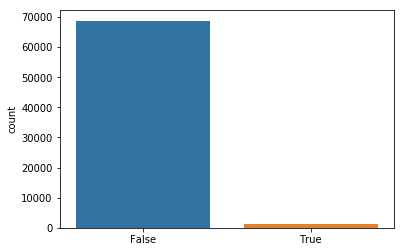

In [10]:
sns.countplot(s)

In [48]:
# Height is less than 2.5 percentile
data['height'].quantile(0.025)

150.0

C:\Users\sridhar\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


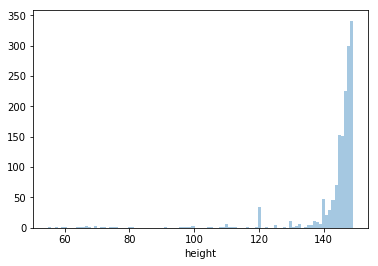

In [49]:
q=data[data['height']<150]['height']
sns.distplot(q,hist=True,kde=False,bins=100)

In [41]:
# Height is  more than 97.5 percentile
data['height'].quantile(0.975)

180.0

C:\Users\sridhar\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


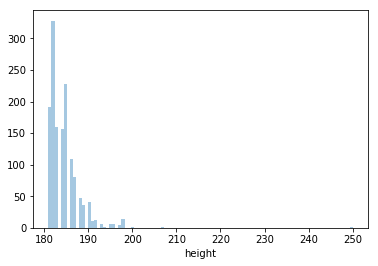

In [40]:
q2=data[data['height']>180]['height']
sns.distplot(q2,hist=True,kde=False,bins=100)

In [43]:
#weight is less than 2.5 percentile
data['weight'].quantile(0.025)

51.0

C:\Users\sridhar\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


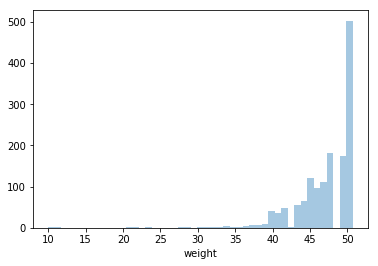

In [46]:
q3=data[data['weight']<51]['weight']
sns.distplot(q3,hist=True,kde=False)

In [47]:
# Weight is  more than 97.5 percentile
data['weight'].quantile(0.975)

108.0

C:\Users\sridhar\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


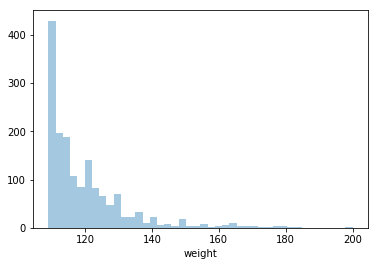

In [64]:
q4=data[data['weight']>108]['weight']
sns.distplot(q4,hist=True,kde=False)

Question 2.1.  Which pair of features has the strongest Pearson's correlation with the gender feature?

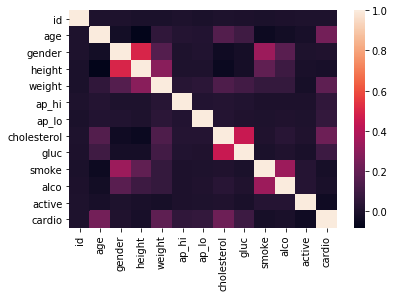

In [40]:
corr_plot=data.corr()
sns.heatmap(corr_plot)

In [41]:
# Height and Smoke has strongest pearson's correlation with gender feature

Height distribution of men and women

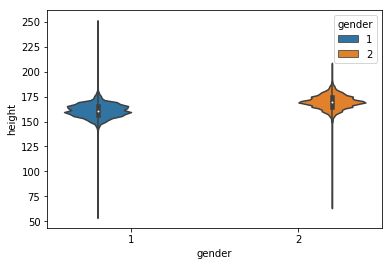

In [42]:
sns.violinplot(x='gender', y='height',hue='gender', data=data)

Question 2.2. Which pair of features has the strongest Spearman correlation?

    1.Height, Weight
    2.Age, Weight
    3.Cholesterol, Gluc
    4.Cardio, Cholesterol
    5.Ap_hi, Ap_lo
    6.Smoke, Alco


In [43]:
from scipy.stats import spearmanr

In [44]:
rho, pval=spearmanr(data['ap_hi'],data['ap_lo'],axis=0)

In [45]:
rho

0.7354361051379776

In [46]:
# ap_hi, ap_lo has strong spearman correlation

Question 2.3.  Why do these features have strong rank correlation?

    1.Inaccuracies in the data (data acquisition errors).
    2.Relation is wrong, these features should not be related.
    3.Nature of the data.


In [47]:
#Because of Nature of data ap_hi, ap_lo features has strong spearman correlation

Question 2.4. What is the smallest age at which the number of people with CVD outnumber the number of people without CVD?

In [48]:
age_years=round(data['age']/365)

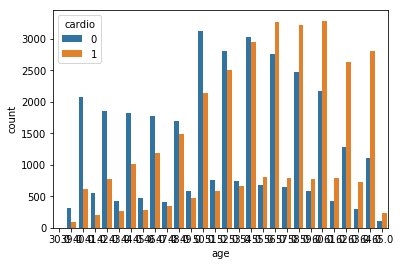

In [49]:
plt.figure(figsize=(8,4))
sns.countplot(x=age_years, hue='cardio', data=data)

In [50]:
# At 55 yrs age no.of CVD people exceeding  no.of people without CVD